<a href="https://colab.research.google.com/github/harry84523/maingit/blob/master/GoogleMap%E7%BE%8E%E9%A3%9F%E8%A9%95%E8%AB%96%E6%96%87%E5%AD%97%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 主題.google map 評論文字分析

##1.載入套件+建立資料夾

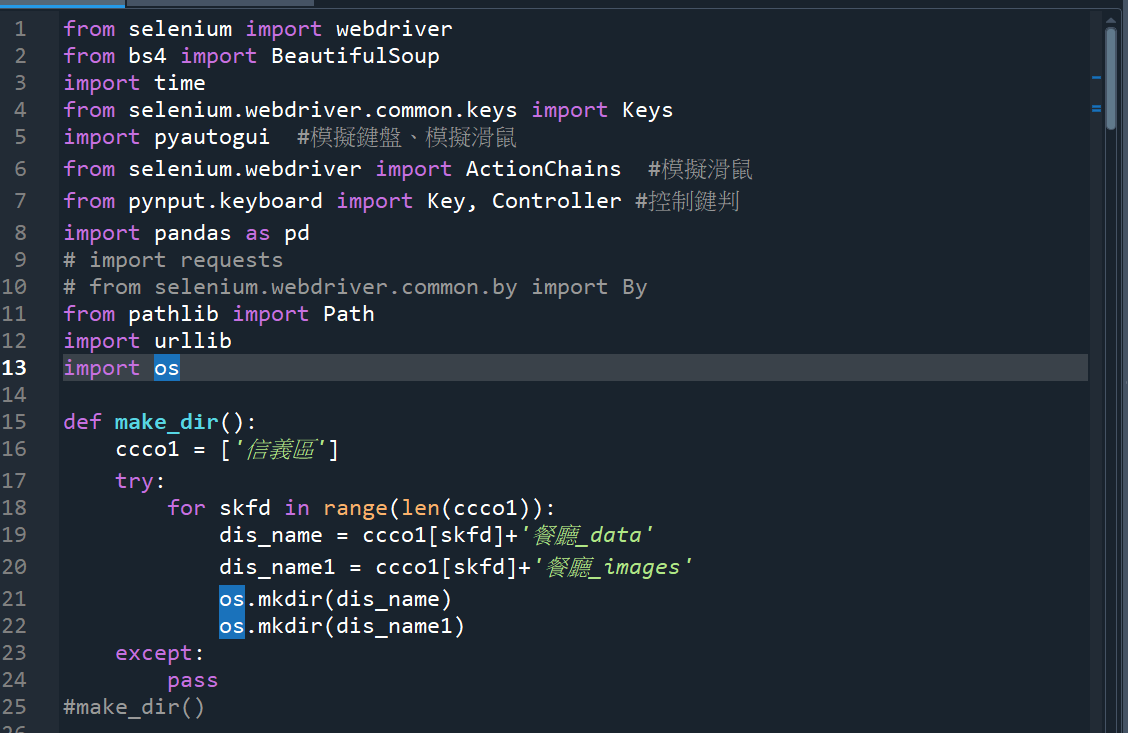

##2.建空list裝等等爬取的資料&設定變數

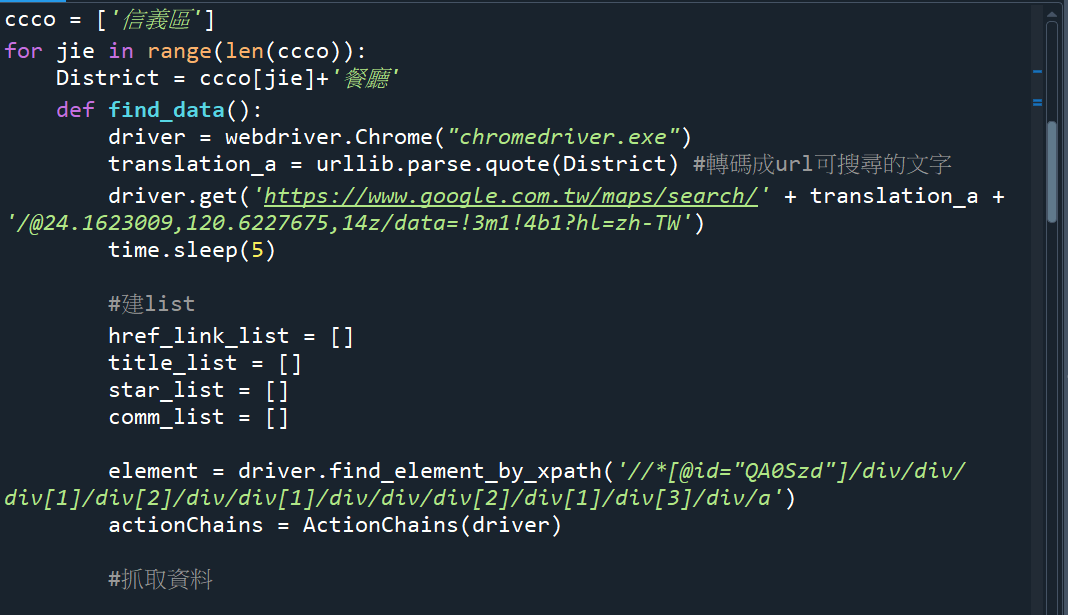

##3.資料清洗

* 1.資料中有裝取道重複的商店資訊,因此先將重複的店家名篩取掉
* 2.有些店家並不是餐廳，一樣做刪除動作


In [ ]:
import pandas as pd

In [ ]:
df_res=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spyder/google food/商家網址連結.csv',encoding='utf-8-sig')
df_res

,店名,網址,星級,評論
0,ABV Bar & Kitchen 加勒比海餐酒館 啤 酒餐廳 精釀啤 酒 加勒比海料理 南...,https://www.google.com.tw/maps/place/ABV+Bar+%...,4.4,"1,803"
1,French Windows British Teahouse 琺蘭綺瑥朵英式茶餐館,https://www.google.com.tw/maps/place/French+Wi...,4.8,"3,518"
2,JK STUDIO 新義法料理,https://www.google.com.tw/maps/place/JK+STUDIO...,4.7,"1,631"
3,艾朋牛排餐酒館 À POINT STEAK & BAR,https://www.google.com.tw/maps/place/%E8%89%BE...,4.6,"4,238"
4,吉比鮮釀餐廳 - 信義店,https://www.google.com.tw/maps/place/%E5%90%89...,4.3,"2,781"
...,...,...,...,...
274,啜飲室 Landmark (Craft Beer Taproom 精釀啤酒專賣店),https://www.google.com.tw/maps/place/%E5%95%9C...,4.5,"1,074"
275,粵亮廣式料理-台北六福萬怡酒店,https://www.google.com.tw/maps/place/%E7%B2%B5...,4.2,"1,150"
276,統一時代百貨 台北店,https://www.google.com.tw/maps/place/%E7%B5%B1...,4.3,"2,829"
277,吳興商圈,https://www.google.com.tw/maps/place/%E5%90%B3...,3.9,"2,004"


In [ ]:
df_res2=df_res.drop_duplicates(subset = "店名") # 將店名重複的欄位刪道到剩一個   
df_res3=df_res2.reset_index()
del df_res3['index']
df_res3

,店名,網址,星級,評論
0,ABV Bar & Kitchen 加勒比海餐酒館 啤 酒餐廳 精釀啤 酒 加勒比海料理 南...,https://www.google.com.tw/maps/place/ABV+Bar+%...,4.4,"1,803"
1,French Windows British Teahouse 琺蘭綺瑥朵英式茶餐館,https://www.google.com.tw/maps/place/French+Wi...,4.8,"3,518"
2,JK STUDIO 新義法料理,https://www.google.com.tw/maps/place/JK+STUDIO...,4.7,"1,631"
3,艾朋牛排餐酒館 À POINT STEAK & BAR,https://www.google.com.tw/maps/place/%E8%89%BE...,4.6,"4,238"
4,吉比鮮釀餐廳 - 信義店,https://www.google.com.tw/maps/place/%E5%90%89...,4.3,"2,781"
...,...,...,...,...
252,啜飲室 Landmark (Craft Beer Taproom 精釀啤酒專賣店),https://www.google.com.tw/maps/place/%E5%95%9C...,4.5,"1,074"
253,粵亮廣式料理-台北六福萬怡酒店,https://www.google.com.tw/maps/place/%E7%B2%B5...,4.2,"1,150"
254,統一時代百貨 台北店,https://www.google.com.tw/maps/place/%E7%B5%B1...,4.3,"2,829"
255,吳興商圈,https://www.google.com.tw/maps/place/%E5%90%B3...,3.9,"2,004"


* 將不對的資料(不是餐廳)刪除

In [ ]:
drop_list=['誠品信義店','微風信義','微風南山','寶麗廣場','信義威秀商圈','新光三越 台北信義新天地A4','Grand Hyatt Taipei','寒舍艾麗酒店','新光三越 台北信義新天地A11','台北W飯店','Bencotto','台北101','誠品生活松菸店','J.W. Teres, the Bulgarian Restaurant','茹絲葵美式牛排','粵亮廣式料理-台北六福萬怡酒店','統一時代百貨 台北店','吳興商圈']

for i in drop_list:    
    df_res3=df_res3.drop(df_res3[df_res3["店名"]==i].index)
print('剩餘的資料有%d筆'%len(df_res3))    

剩餘的資料有239筆


* 將資料存成csv檔

In [ ]:
df_res3.to_csv('C:/Users/user/Downloads/BIG_DATA/web crawler/信義區餐廳_data/商家網址連結(已清洗).csv', index=False, encoding='utf-8-sig')

*  將星級大於四星以及評論大於500責的店家篩選出來

In [ ]:
def select_data():
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spyder/google food/商家網址連結(已清洗)備分.csv')
    df['評論'] = df['評論'].replace('沒有評論', '0')
    df['星級'] = df['星級'].replace('沒有評論', '0')
    df['評論'] = df['評論'].str.replace(',', '')
    df['星級'] = df[['星級']].astype(float)
    df['評論'] = df[['評論']].astype(int)
    df = df[(df["評論"] > 500) & (df["星級"] > 4.0)]
    df['回復'] = ''
    df['地址'] = ''
    df.to_csv('C:/Users/user/Downloads/BIG_DATA/web crawler/信義區餐廳_data/信義區餐廳_篩選評論.csv', encoding='utf-8-sig', index=False)
select_data()    

In [ ]:
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spyder/google food/信義區餐廳_篩選評論.csv', encoding='utf-8-sig')

,店名,網址,星級,評論,回復,地址
0,ABV Bar & Kitchen 加勒比海餐酒館 啤 酒餐廳 精釀啤 酒 加勒比海料理 南...,https://www.google.com.tw/maps/place/ABV+Bar+%...,4.4,1803,NaN,NaN
1,French Windows British Teahouse 琺蘭綺瑥朵英式茶餐館,https://www.google.com.tw/maps/place/French+Wi...,4.8,3518,NaN,NaN
2,JK STUDIO 新義法料理,https://www.google.com.tw/maps/place/JK+STUDIO...,4.7,1631,NaN,NaN
3,艾朋牛排餐酒館 À POINT STEAK & BAR,https://www.google.com.tw/maps/place/%E8%89%BE...,4.6,4238,NaN,NaN
4,吉比鮮釀餐廳 - 信義店,https://www.google.com.tw/maps/place/%E5%90%89...,4.3,2781,NaN,NaN
...,...,...,...,...,...,...
130,巴雷巴雷印度餐廳,https://www.google.com.tw/maps/place/%E5%B7%B4...,4.8,5957,NaN,NaN
131,三明治 Liquid Bread Company,https://www.google.com.tw/maps/place/%E4%B8%89...,4.2,819,NaN,NaN
132,欣葉日本料理 健康店,https://www.google.com.tw/maps/place/%E6%AC%A3...,4.1,6963,NaN,NaN
133,M One Cafe 大安館,https://www.google.com.tw/maps/place/M+One+Caf...,4.3,2335,NaN,NaN


## 4.抓取留言以及地址

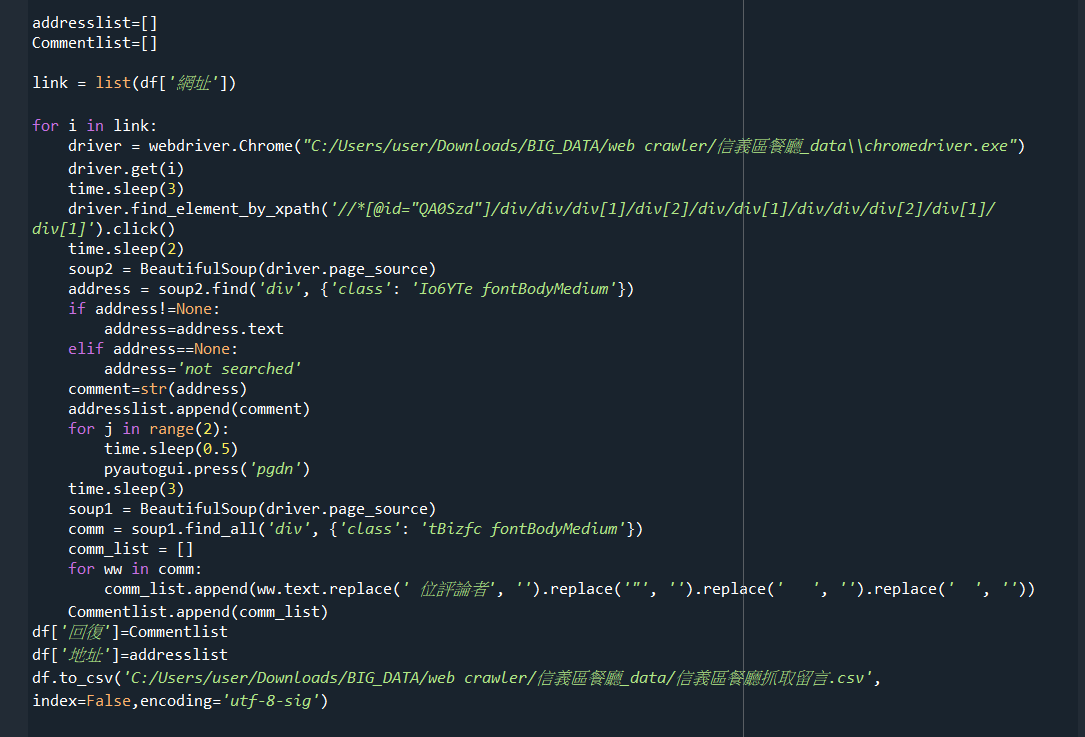

In [ ]:
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spyder/google food/信義區餐廳抓取留言.csv', encoding='utf-8-sig')

,店名,網址,星級,評論,回復,地址
0,ABV Bar & Kitchen 加勒比海餐酒館 啤 酒餐廳 精釀啤 酒 加勒比海料理 南...,https://www.google.com.tw/maps/place/ABV+Bar+%...,4.4,1803,"['烤鱸魚好吃、咖啡黑皮酒燉牛肉口味濃郁下飯，啤酒選擇很多，是個小酌的好地方。 ', '服務...",106台北市大安區敦化南路一段233巷61號
1,French Windows British Teahouse 琺蘭綺瑥朵英式茶餐館,https://www.google.com.tw/maps/place/French+Wi...,4.8,3518,"['老闆非常用心在經營，裡面的店員男的帥女的美，店內服務非常好，可比美五星飯店。 ', '服...",110台北市信義區忠孝東路四段553巷22弄51-1號
2,JK STUDIO 新義法料理,https://www.google.com.tw/maps/place/JK+STUDIO...,4.7,1631,"['飯(均加飯加麵)，餘選擇多道沙拉及開胃菜，上菜速度快，食材與口味都很好。 ', '海鮮燉...",110台北市信義區基隆路一段147巷5弄13號
3,艾朋牛排餐酒館 À POINT STEAK & BAR,https://www.google.com.tw/maps/place/%E8%89%BE...,4.6,4238,"['氣氛不錯，交通也很方便。五星評論送薯條，當月生日壽星套餐打8折，還送一個小蛋糕。 ', ...",110台北市信義區忠孝東路五段139號2樓
4,吉比鮮釀餐廳 - 信義店,https://www.google.com.tw/maps/place/%E5%90%89...,4.3,2781,"['其實美式餐廳，就是炸物，雞翅，BBQ,義大利麵，薯條，啤酒，餐點很多香料。 ', '鮭魚...",110台北市信義區松壽路11號
...,...,...,...,...,...,...
130,巴雷巴雷印度餐廳,https://www.google.com.tw/maps/place/%E5%B7%B4...,4.8,5957,"['餐點跟服務很好，白醬窯烤嫩雞塊有炭烤香，羊肉咖哩肉質軟嫩，搭配烤餅很合胃口。 ', '推...",105台北市松山區光復北路12號1樓
131,三明治 Liquid Bread Company,https://www.google.com.tw/maps/place/%E4%B8%89...,4.2,819,"['抹醬一面是墨西哥辣椒醬，一面是玉米洋蔥沙拉佐檸檬汁，中間鹹香軟爛墨式燉肉。 ', '店內...",106台北市大安區延吉街270號
132,欣葉日本料理 健康店,https://www.google.com.tw/maps/place/%E6%AC%A3...,4.1,6963,"['菜色多樣，湯頭棒，甜點，咖啡，美酒，壽司，海苔捲，牛排，甜蝦，等等吃的好不過癮~ ', ...",105台北市松山區健康路156號
133,M One Cafe 大安館,https://www.google.com.tw/maps/place/M+One+Caf...,4.3,2335,"['什錦蛋捲好吃 法國吐司火雞火腿起士三明治 好吃 但環境吵雜 還是推👍 ', '非常棒的美...",106台北市大安區仁愛路四段27巷6-1號


##1. 處理斷詞、標點、表情符號
##2. 10大關鍵字
##3. 情感分析

In [ ]:
!pip install ckiptagger

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from ckiptagger import data_utils
data_utils.download_data_gdown("./")

Downloading...
From: https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
To: /content/data.zip
100%|██████████| 1.88G/1.88G [00:15<00:00, 120MB/s] 


#### 所有評論中最常出現的前10大關鍵字

In [ ]:
import jieba
import jieba.analyse

In [ ]:
text = open('/content/drive/MyDrive/Colab Notebooks/spyder/google food/信義區評論.txt').read()

In [ ]:
tags= jieba.analyse.extract_tags(text, topK=25, withWeight=True)
for tag, weight in tags:
    print(tag + "," + str(int(weight * 10000)))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.222 seconds.
Prefix dict has been built successfully.


好吃,2157
服務,1579
餐點,1421
推薦,1237
不錯,1158
氣氛,1132
環境,1053
很棒,1004
餐廳,947
甜點,947
食材,842
海鮮,842
新鮮,763
口味,728
適合,684
份量,657
親切,631
牛肉,610
服務人員,579
口感,565
專業,552
飲料,552
用餐,547
沙拉,533
套餐,533


從評論中得到了消費者對這一區餐廳所期待的要素與感受

前10大評論中並未出現有關價格評論的字詞，洞悉出這一區消費者的消費力大致處於對價格不敏感的族群

比起便宜、實惠這裡的消費者更加注重品質、高檔、裝潢

#### 斷詞處理

In [ ]:
from ckiptagger import WS, POS, NER

In [ ]:
ws = WS("./data")
pos = POS("./data")
ner = NER("./data")

/usr/local/lib/python3.7/dist-packages/ckiptagger/model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:988: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  partitioner=maybe_partitioner)
/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:996: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  initializer=initializer)
/usr/local/lib/python3.7/dist-packages/ckiptagger/model_pos.py:56: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class

In [ ]:
print(text)

回復
['烤鱸魚好吃、咖啡黑皮酒燉牛肉口味濃郁下飯，啤酒選擇很多，是個小酌的好地方。 ', '服務親切、介紹客人啤酒種類很專業，很歡喜店裡的氣氛 ', '香蕉的甜味配上起司真的很棒很特別！豬肋排飯海鮮飯也都很大份很好吃喔～ ']
['老闆非常用心在經營，裡面的店員男的帥女的美，店內服務非常好，可比美五星飯店。 ', '服務人員很親切、貼心～主餐義大利麵、燉飯都好好吃！甜點鬆餅司康也很棒🤤 ', '一間難得氣氛佳、餐點用心，服務專業的餐廳，建議可以來個悠閒的下午茶時光 ']
['飯(均加飯加麵)，餘選擇多道沙拉及開胃菜，上菜速度快，食材與口味都很好。 ', '海鮮燉飯料多實在蝦子非常甜美，牛小排份量十足價格親民，值得推薦的好餐廳 ', '上餐速度快，食物也好吃，氣氛環境都很棒，服務人員Nina的服務也很棒。 ']
['氣氛不錯，交通也很方便。五星評論送薯條，當月生日壽星套餐打8折，還送一個小蛋糕。 ', '街景美氣氛佳，服務好食材棒。真是高檔餐廳花得滿意。 ', '酥皮海鮮濃湯, 燻鮭魚蘿蔓沙拉,嫩肩牛排 口味符合預期 服務親切 用餐愉快 ']
['其實美式餐廳，就是炸物，雞翅，BBQ,義大利麵，薯條，啤酒，餐點很多香料。 ', '鮭魚沙拉和雞肉比薩味道不錯，松露牛肉燉飯和牛肉丸前菜好吃 ', '再點了一次 牛排三明治 佐地瓜薯條 飯後甜品是胡蘿蔔蛋糕 怎麼可以這麼好吃😋 ']
['奶油鮮蝦秀珍菇義大利麵超級好吃 什麼都好吃 牛肉漢堡 海鮮拼盤 蛤蠣濃湯也好喝！ ', '戶外區夜景很棒！服務人員非常熱情，餐點豐盛cp高，生日或節日有許多慶祝互動活動。 ', '咖啡茶無限續杯 起司蛋糕還蠻好吃的 骰子牛口味偏鹹比較有嚼勁 ']
['氣氛佳，餐點好吃，夜景很美，人員服務極優，推薦店員Jill。 ', '食材高級、服務人員親切專業，肉處理得恰到好處。裝潢舒適寬敞，景色優美。 ', '甜點部分清爽不甜膩，頗為驚艷，還有飯後茶咖啡可以選擇。 ']
['氣氛上佳，服務溫和周到 主菜菲力、海鮮味道熟度合宜 松露薯條與檸檬派稍嫌平凡 ', '珍寶蟹餅、龍蝦濃湯 、餐前麵包都很好吃,幸運坐在窗邊位置,夜景美氣氛佳! ', '這種服務態度比八方雲集水餃店還差，東西貴成這樣服務態度比夜市賣滷味還扯，扯到爆 ']
['包廂低消6000元， 空間寬敞明亮 ，菜色以四川菜為主。口味佳，服務可。 

In [ ]:
comment_list = []
comment_list.append(text)

In [ ]:
print(comment_list)

["回復\n['烤鱸魚好吃、咖啡黑皮酒燉牛肉口味濃郁下飯，啤酒選擇很多，是個小酌的好地方。 ', '服務親切、介紹客人啤酒種類很專業，很歡喜店裡的氣氛 ', '香蕉的甜味配上起司真的很棒很特別！豬肋排飯海鮮飯也都很大份很好吃喔～ ']\n['老闆非常用心在經營，裡面的店員男的帥女的美，店內服務非常好，可比美五星飯店。 ', '服務人員很親切、貼心～主餐義大利麵、燉飯都好好吃！甜點鬆餅司康也很棒🤤 ', '一間難得氣氛佳、餐點用心，服務專業的餐廳，建議可以來個悠閒的下午茶時光 ']\n['飯(均加飯加麵)，餘選擇多道沙拉及開胃菜，上菜速度快，食材與口味都很好。 ', '海鮮燉飯料多實在蝦子非常甜美，牛小排份量十足價格親民，值得推薦的好餐廳 ', '上餐速度快，食物也好吃，氣氛環境都很棒，服務人員Nina的服務也很棒。 ']\n['氣氛不錯，交通也很方便。五星評論送薯條，當月生日壽星套餐打8折，還送一個小蛋糕。 ', '街景美氣氛佳，服務好食材棒。真是高檔餐廳花得滿意。 ', '酥皮海鮮濃湯, 燻鮭魚蘿蔓沙拉,嫩肩牛排 口味符合預期 服務親切 用餐愉快 ']\n['其實美式餐廳，就是炸物，雞翅，BBQ,義大利麵，薯條，啤酒，餐點很多香料。 ', '鮭魚沙拉和雞肉比薩味道不錯，松露牛肉燉飯和牛肉丸前菜好吃 ', '再點了一次 牛排三明治 佐地瓜薯條 飯後甜品是胡蘿蔔蛋糕 怎麼可以這麼好吃😋 ']\n['奶油鮮蝦秀珍菇義大利麵超級好吃 什麼都好吃 牛肉漢堡 海鮮拼盤 蛤蠣濃湯也好喝！ ', '戶外區夜景很棒！服務人員非常熱情，餐點豐盛cp高，生日或節日有許多慶祝互動活動。 ', '咖啡茶無限續杯 起司蛋糕還蠻好吃的 骰子牛口味偏鹹比較有嚼勁 ']\n['氣氛佳，餐點好吃，夜景很美，人員服務極優，推薦店員Jill。 ', '食材高級、服務人員親切專業，肉處理得恰到好處。裝潢舒適寬敞，景色優美。 ', '甜點部分清爽不甜膩，頗為驚艷，還有飯後茶咖啡可以選擇。 ']\n['氣氛上佳，服務溫和周到 主菜菲力、海鮮味道熟度合宜 松露薯條與檸檬派稍嫌平凡 ', '珍寶蟹餅、龍蝦濃湯 、餐前麵包都很好吃,幸運坐在窗邊位置,夜景美氣氛佳! ', '這種服務態度比八方雲集水餃店還差，東西貴成這樣服務態度比夜市賣滷味還扯，扯到爆 ']\n['包廂低消6000元， 空間寬敞明亮 ，菜色以四川菜為

In [ ]:
!pip install snownlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 37.6 MB 1.2 MB/s 
  Created wheel for snownlp: filename=snownlp-0.12.3-py3-none-any.whl size=37760963 sha256=c770967b3cf2a8aac54d5ba9e34a065b19bea5978d63bed8dd7ef517e32744d8
  Stored in directory: /root/.cache/pip/wheels/4a/7a/fe/a5747434679b22a95c93bcf9fa49a988f5d9be56366bdf6c79
Successfully built snownlp


In [ ]:
from snownlp import SnowNLP
from snownlp import sentiment    # 情緒
from snownlp import seg

# 文字雲
## Colab 新安裝好文字雲 wordcloud 。不需要去安裝。
- !pip install wordcloud

In [ ]:
!pip install pywordseg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for overrides: filename=overrides-1.9-py3-none-any.whl size=4209 sha256=03518c36b5cca4c76ba4f8a7beca6868982ba51a834dab88ec6d0e332e702a6f
  Stored in directory: /root/.cache/pip/wheels/7e/cd/87/98662c7c444baa506000ae55f638e46580b933ac2e9b9e0a1c
Successfully built overrides


In [ ]:
# import the module
from pywordseg import *

Using pywordseg for the first time, download CharEmb model.
Download models ...100%, 29 MB, 1644 KB/s, 18 seconds passed
CharEmb built!
Using pywordseg for the first time, download main segmentation system models.
Download models ...100%, 212 MB, 4488 KB/s, 48 seconds passed
models built!
Using pywordseg for the first time, download ELMo model.
Download models ...100%, 336 MB, 5020 KB/s, 68 seconds passed
ELMoForManyLangs built!


In [ ]:
# declare the segmentor.
seg = Wordseg(batch_size=64, device="cuda:0", embedding='elmo', elmo_use_cuda=True, mode="TW")

# input is a list of raw sentences.
# seg.cut([])

In [ ]:
json.loads(a[0].replace('\'','\"'))

['烤鱸魚好吃、咖啡黑皮酒燉牛肉口味濃郁下飯，啤酒選擇很多，是個小酌的好地方。 ',
 '服務親切、介紹客人啤酒種類很專業，很歡喜店裡的氣氛 ',
 '香蕉的甜味配上起司真的很棒很特別！豬肋排飯海鮮飯也都很大份很好吃喔～ ']

In [ ]:
json.loads(i.replace('\'','\"'))

In [ ]:
# 資料清洗
import json
resultList =[]
# text.replace("回復","")
a= text.replace("回復","").split("\n")[1:-1]

for i  in range(len(a)):

  resultList.append(json.loads(a[i].replace("\'","\"")))

In [ ]:
resultList[0]

['烤鱸魚好吃、咖啡黑皮酒燉牛肉口味濃郁下飯，啤酒選擇很多，是個小酌的好地方。 ',
 '服務親切、介紹客人啤酒種類很專業，很歡喜店裡的氣氛 ',
 '香蕉的甜味配上起司真的很棒很特別！豬肋排飯海鮮飯也都很大份很好吃喔～ ']

In [ ]:
# declare the segmentor.
seg = Wordseg(batch_size=64, device="cuda:0", embedding='elmo', elmo_use_cuda=True, mode="TW")
for i in range(len(resultList)):
  # input is a list of raw sentences.
  print(seg.cut(resultList[i]))
  

[['烤', '鱸魚', '好吃', '、', '咖啡', '黑', '皮', '酒', '燉', '牛肉', '口味', '濃郁', '下飯', ',', '啤酒', '選擇', '很多', ',', '是', '個', '小酌', '的', '好', '地方', '。'], ['服務', '親切', '、', '介紹', '客人', '啤酒', '種類', '很', '專業', ',', '很', '歡喜店', '裡', '的', '氣氛'], ['香蕉', '的', '甜味', '配上', '起司', '真的', '很', '棒', '很', '特別', '!', '豬肋排飯', '海鮮飯', '也', '都', '很', '大份', '很', '好吃', '喔', '~']]
[['老闆', '非常', '用心', '在', '經營', ',', '裡面', '的', '店員', '男', '的', '帥女', '的', '美', ',', '店', '內', '服務', '非常', '好', ',', '可', '比美', '五星', '飯店', '。'], ['服務', '人員', '很', '親切', '、', '貼心', '~', '主餐', '義大利麵', '、', '燉飯', '都', '好', '好吃', '!', '甜點', '鬆餅', '司康', '也', '很', '棒🤤'], ['一', '間', '難得', '氣氛', '佳', '、', '餐點', '用心', ',', '服務', '專業', '的', '餐廳', ',', '建議', '可以', '來', '個', '悠閒', '的', '下午茶', '時光']]
[['飯', '(', '均', '加', '飯', '加', '麵', ')', ',', '餘', '選擇', '多', '道', '沙拉', '及', '開胃菜', ',', '上菜', '速度', '快', ',', '食材', '與', '口味', '都', '很', '好', '。'], ['海鮮', '燉飯', '料', '多', '實在', '蝦子', '非常', '甜美', ',', '牛', '小', '排', '份量', '十足', '價格', '親民', ',', '值得', '推薦', '的'

In [ ]:
json.loads(a[1].replace('\'','\"'))

['老闆非常用心在經營，裡面的店員男的帥女的美，店內服務非常好，可比美五星飯店。 ',
 '服務人員很親切、貼心～主餐義大利麵、燉飯都好好吃！甜點鬆餅司康也很棒🤤 ',
 '一間難得氣氛佳、餐點用心，服務專業的餐廳，建議可以來個悠閒的下午茶時光 ']

In [ ]:
!pip install -U ckiptagger[tfgpu,gdown]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.4 kB/s 
     |████████████████████████████████| 438 kB 73.8 MB/s 
     |████████████████████████████████| 1.6 MB 28.8 MB/s 
     |████████████████████████████████| 5.8 MB 56.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [ ]:
from ckiptagger import construct_dictionary

In [ ]:


# 用它們的相對權重創建字典以優先考慮。
word_to_weight  =  { 
  "烤鱸魚" :  3.0 ,
  "服務很好" :  1.0 ,  
  "你個人" :  1.0 , 
  "或者是" :  1.0 ,
  "有興趣" :  1.0 , 
  "續杯" :  1.0 ,
  "無限供應" :  1.0 ,
  "不甜" :  1.0 ,
  "出餐" :  1.0 ,
  "水牛乳酪沙拉":1.0,
  "虎蝦烏魚子雞蛋麵":1.0,
  "app設計":1.0,
  "明太子":1.0,
  "偏鹹一點":1.0,
  "很好吃":1.0,
  "很特別":1.0,
  "很新鮮":1.0,
  "很便宜":1.0,
  "很方便":1.0,
  "很親切":1.0,
  "很喜歡":1.0,
  "很滿意":1.0,
  "很熱心":1.0,
  "很好":1.0,
  "很不錯":1.0,
  "很讚":1.0,
  "很美":1.0,
  "很用心":1.0,
  "很棒":1.0,
  "很有":1.0,
  "很快":1.0,
  "很高":1.0,
  "很實在":1.0,
  "很專業":1.0,
  "很適合":1.0,
  "很豐富":1.0,
  "很道地":1.0,
  "很嫩":1.0,
  "很推薦":1.0,
  "很滿足":1.0,
  "很放鬆":1.0,
  "很合胃口":1.0,
  "有興趣的" :  "2.0" , 
} 
dictionary  =construct_dictionary(word_to_weight) 
print ( dictionary )  

[(2, {'續杯': 1.0, '不甜': 1.0, '出餐': 1.0, '很好': 1.0, '很讚': 1.0, '很美': 1.0, '很棒': 1.0, '很有': 1.0, '很快': 1.0, '很高': 1.0, '很嫩': 1.0}), (3, {'烤鱸魚': 3.0, '你個人': 1.0, '或者是': 1.0, '有興趣': 1.0, '明太子': 1.0, '很好吃': 1.0, '很特別': 1.0, '很新鮮': 1.0, '很便宜': 1.0, '很方便': 1.0, '很親切': 1.0, '很喜歡': 1.0, '很滿意': 1.0, '很熱心': 1.0, '很不錯': 1.0, '很用心': 1.0, '很實在': 1.0, '很專業': 1.0, '很適合': 1.0, '很豐富': 1.0, '很道地': 1.0, '很推薦': 1.0, '很滿足': 1.0, '很放鬆': 1.0}), (4, {'服務很好': 1.0, '無限供應': 1.0, '偏鹹一點': 1.0, '很合胃口': 1.0, '有興趣的': 2.0}), (5, {'app設計': 1.0}), (6, {'水牛乳酪沙拉': 1.0}), (8, {'虎蝦烏魚子雞蛋麵': 1.0})]


In [ ]:
len(dictionary)

6

In [ ]:
# 初步觀察資料
with open('/content/drive/MyDrive/Colab Notebooks/spyder/google food/文字探勘/stopWord_test.txt', 'r', encoding='utf-8-sig') as f:
    stops = f.read().split('\n')
allContent = []
for i in range(len(resultList)):
  # input is a list of raw sentences.
  testlist=[]
  words = seg.cut(resultList[i],merge_dict = dictionary)
  if words!=[]:
    
    for word in words[0]:
        if word not in stops:
          testlist.append(word)

    print("|".join(testlist))



烤鱸魚|好吃|咖啡|黑|皮|酒|燉|牛肉|口味|濃郁|下飯|啤酒|選擇|很多|是|個|小酌|好|地方
老闆|非常|用心|在|經營|裡面|店員|男|帥女|美|店|內|服務|非常|好|可|比美|五星|飯店
飯|(|均|加|飯|加|麵|)|餘|選擇|多|道|沙拉|及|開胃菜|上菜|速度|快|食材|與|口味|都|很好
氣氛|不錯|交通|也|很方便|五星|評論|送|薯條|當月|生日|壽星|套餐|打|8折|還|送|一|個|小|蛋糕
其實|美式|餐廳|就|是|炸物|雞翅|BBQ|義大利麵|薯條|啤酒|餐點|很多|香料
奶油|鮮|蝦|秀|珍菇|義大利麵|超級|好吃|什麼|都|好|吃|牛肉|漢堡|海鮮|拼|盤|蛤蠣|濃湯|也|好喝
氣氛|佳|餐點|好吃|夜景|很美|人員|服務|極|優|推薦|店員|Jill
氣氛|上|佳|服務|溫和|周到|主|菜|菲力|海鮮|味道|熟度|合宜|松露|薯條|與|檸檬派|稍|嫌|平凡
包廂|低消|6000|元|空間|寬敞|明亮|菜色|以|四川菜|為主|口味|佳|服務|可
餐點|口味|好吃|鳳梨|炒飯|鹹蛋|中卷|涼拌|蝦筍|單點|份量|大|莓果|思慕|昔真|材|實|料|好好|喝
雙人|下午|茶|甜|點|小巧|可愛|布丁|和|巧克力|蛋糕|頗|具|功力|司康|和|小|漢堡|尚|有|進步|空間
廚師|直接|現場|切|肉|端上|桌😀|服務很好|餐點|也|好吃|裝潢|很美|感覺|來到|城堡|裡面|👍🏻
裝潢|設計|很好|牛肉|豬肉|雞肉|肉質|都|非常|鮮美|服務|人員|很親切|客氣
鹽|烤|魚|下巴|鹽|烤|鮭魚骨|牛排|自然|豬|饗樂骨|松露|野菇|燉飯|都|好吃|柳橙汁|不|錯|喝
關西|壽喜|燒|好吃|肉嫩|食材|多|樣式|服務|ㄧ級|棒|又|好|聊|(|Jin👍|)|有|機會|再|來|吃|燒|肉|~
裝潢|古色古香|氣氛|佳|食材|擺|盤|很用心|豆腐|口感|很特別|服務|人員|很棒
小菜|美味|無限|續|鍋物|湯頭|好|豆腐|滑嫩|泡|菜鍋|普通|牡蠣|鍋|新鮮|美味|飯後|甜點|中上
推薦|原味|小籠包|菜肉|雲吞|豬骨湯|蘿蔔絲餅|馬蹄|水
洋蔥圈|份量|超多|CP值|超高|氣氛|很好|服務生|服務|超好|態度|很棒
菜|推|紅酒|洋蔥|甜點|推薦|起司|水果塔|服務|很棒|倒|酒水|服務員|很有|氣質
蛤蜊湯|蒸蛋|必|點|豬肉|串|烤|魚|下巴

In [ ]:
# 將所有評論 斷詞之後放在一個list
with open('/content/drive/MyDrive/Colab Notebooks/spyder/google food/文字探勘/stopWord_test.txt', 'r', encoding='utf-8-sig') as f:
    stops = f.read().split('\n')
allContent = []
for i in range(len(resultList)):
  # input is a list of raw sentences.

  words = seg.cut(resultList[i],merge_dict = dictionary)
  if words!=[]:
    
    for word in words[0]:
        if word not in stops:

          allContent.append(word)

print(allContent)

['烤鱸魚', '好吃', '咖啡', '黑', '皮', '酒', '燉', '牛肉', '口味', '濃郁', '下飯', '啤酒', '選擇', '很多', '是', '個', '小酌', '好', '地方', '老闆', '非常', '用心', '在', '經營', '裡面', '店員', '男', '帥女', '美', '店', '內', '服務', '非常', '好', '可', '比美', '五星', '飯店', '飯', '(', '均', '加', '飯', '加', '麵', ')', '餘', '選擇', '多', '道', '沙拉', '及', '開胃菜', '上菜', '速度', '快', '食材', '與', '口味', '都', '很好', '氣氛', '不錯', '交通', '也', '很方便', '五星', '評論', '送', '薯條', '當月', '生日', '壽星', '套餐', '打', '8折', '還', '送', '一', '個', '小', '蛋糕', '其實', '美式', '餐廳', '就', '是', '炸物', '雞翅', 'BBQ', '義大利麵', '薯條', '啤酒', '餐點', '很多', '香料', '奶油', '鮮', '蝦', '秀', '珍菇', '義大利麵', '超級', '好吃', '什麼', '都', '好', '吃', '牛肉', '漢堡', '海鮮', '拼', '盤', '蛤蠣', '濃湯', '也', '好喝', '氣氛', '佳', '餐點', '好吃', '夜景', '很美', '人員', '服務', '極', '優', '推薦', '店員', 'Jill', '氣氛', '上', '佳', '服務', '溫和', '周到', '主', '菜', '菲力', '海鮮', '味道', '熟度', '合宜', '松露', '薯條', '與', '檸檬派', '稍', '嫌', '平凡', '包廂', '低消', '6000', '元', '空間', '寬敞', '明亮', '菜色', '以', '四川菜', '為主', '口味', '佳', '服務', '可', '餐點', '口味', '好吃', '鳳梨', '炒飯', '鹹蛋', '中卷', '涼拌', '蝦筍', '單點

In [ ]:
# 計算其數量
from collections import Counter
Counter(allContent)

Counter({'烤鱸魚': 1,
         '好吃': 38,
         '咖啡': 7,
         '黑': 1,
         '皮': 2,
         '酒': 1,
         '燉': 4,
         '牛肉': 9,
         '口味': 15,
         '濃郁': 5,
         '下飯': 2,
         '啤酒': 3,
         '選擇': 5,
         '很多': 3,
         '是': 16,
         '個': 4,
         '小酌': 1,
         '好': 24,
         '地方': 5,
         '老闆': 2,
         '非常': 13,
         '用心': 3,
         '在': 6,
         '經營': 1,
         '裡面': 4,
         '店員': 6,
         '男': 1,
         '帥女': 1,
         '美': 3,
         '店': 5,
         '內': 5,
         '服務': 41,
         '可': 7,
         '比美': 1,
         '五星': 3,
         '飯店': 2,
         '飯': 8,
         '(': 7,
         '均': 1,
         '加': 4,
         '麵': 4,
         ')': 7,
         '餘': 1,
         '多': 13,
         '道': 3,
         '沙拉': 8,
         '及': 12,
         '開胃菜': 2,
         '上菜': 2,
         '速度': 2,
         '快': 2,
         '食材': 15,
         '與': 14,
         '都': 30,
         '很好': 5,
         '氣氛': 15,
    

In [ ]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/spyder/google food/文字探勘")

In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/data/文字探勘


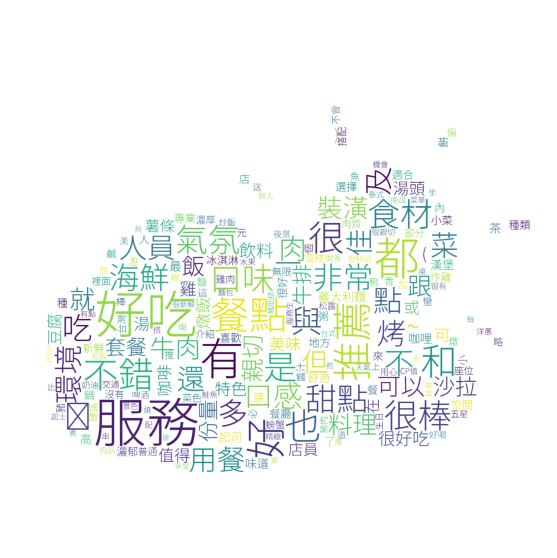

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
from collections import Counter
from PIL import Image
import numpy as np
import requests
with open('/content/drive/MyDrive/Colab Notebooks/spyder/google food/文字探勘/stopWord_test.txt', 'r', encoding='utf-8-sig') as f:
    stops = f.read().split('\n')
allContent = []
for i in range(len(resultList)):
  # input is a list of raw sentences.

  words = seg.cut(resultList[i],merge_dict = dictionary)
  if words!=[]:
    
    for word in words[0]:
        if word not in stops:
          
            allContent.append(word)
diction = Counter(allContent)
fontfile = requests.get("https://drive.google.com/uc?id=1QdaqR8Setf4HEulrIW79UEV_Lg_fuoWz&export=download")
with open('taipei_sans_tc_beta.ttf', 'wb') as f:
  f.write(fontfile.content)
#wordcloud = WordCloud(font_path='taipei_sans_tc_beta.ttf') 
mask = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/spyder/google food/文字探勘/—Pngtree—2.png")) 
wordcloud = WordCloud(background_color="white",mask=mask,font_path='taipei_sans_tc_beta.ttf') 
wordcloud.generate_from_frequencies(frequencies=diction)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
wordcloud.to_file("bookCloud.png")